In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
try:
    df = pd.read_csv('data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully.


In [10]:
print("\n--- Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nValue counts for 'Churn':")
print(df['Churn'].value_counts())


--- Initial Data Inspection ---
First 5 rows of the dataset:
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.

In [11]:
df['Churn'] = df['Churn'].astype(int)

In [12]:
if 'Phone' in df.columns:
    df = df.drop('Phone', axis=1)
    print("\n'Phone' column dropped.")

In [13]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn', errors='ignore')

In [14]:
print(f"\nCategorical columns identified: {list(categorical_cols)}")
print(f"Numerical columns identified: {list(numerical_cols)}")


Categorical columns identified: ['State', 'International plan', 'Voice mail plan']
Numerical columns identified: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
print("\nDataset after One-Hot Encoding (first 5 rows):")
print(df_encoded.head())
print(f"Shape after encoding: {df_encoded.shape}")


Dataset after One-Hot Encoding (first 5 rows):
   Account length  Area code  Number vmail messages  Total day minutes  \
0             117        408                      0              184.5   
1              65        415                      0              129.1   
2             161        415                      0              332.9   
3             111        415                      0              110.4   
4              49        510                      0              119.3   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0               97             31.37              351.6               80   
1              137             21.95              228.5               83   
2               67             56.59              317.8               97   
3              103             18.77              137.3              102   
4              117             20.28              215.1              109   

   Total eve charge  Total night minutes  ...  Sta

In [17]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (466, 68)
Testing set shape: (201, 68)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [22]:
print("\nFeatures scaled successfully.")


Features scaled successfully.


In [23]:
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')


--- Training Logistic Regression Model ---


In [24]:
log_reg_model.fit(X_train_scaled_df, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [25]:
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [26]:
print("\n--- Model Interpretation ---")
coefficients = log_reg_model.coef_[0]
feature_names = X_train_scaled_df.columns
intercept = log_reg_model.intercept_[0]


--- Model Interpretation ---


In [27]:
print(f"Model Intercept (bias): {intercept:.4f}")
print("\nModel Coefficients (Log-Odds):")
for feature, coef in zip(feature_names, coefficients):
    print(f"  {feature}: {coef:.4f}")

Model Intercept (bias): -2.8913

Model Coefficients (Log-Odds):
  Account length: 0.0110
  Area code: -0.1008
  Number vmail messages: -0.3678
  Total day minutes: 0.3715
  Total day calls: 0.1751
  Total day charge: 0.3717
  Total eve minutes: 0.3462
  Total eve calls: 0.1043
  Total eve charge: 0.3430
  Total night minutes: 0.2314
  Total night calls: 0.0735
  Total night charge: 0.2341
  Total intl minutes: 0.1157
  Total intl calls: -0.0117
  Total intl charge: 0.1256
  Customer service calls: 0.8759
  State_AL: -0.2202
  State_AR: -0.1795
  State_AZ: -0.2438
  State_CA: 0.1963
  State_CO: 0.2609
  State_CT: -0.0685
  State_DC: -0.2187
  State_DE: 0.1293
  State_FL: -0.2382
  State_GA: -0.3716
  State_HI: -0.1204
  State_IA: 0.0185
  State_ID: 0.2399
  State_IL: 0.1006
  State_IN: 0.0292
  State_KS: 0.2576
  State_KY: 0.1680
  State_LA: 0.1211
  State_MA: 0.1633
  State_MD: 0.2600
  State_ME: 0.1463
  State_MI: 0.1251
  State_MN: -0.3284
  State_MO: 0.1800
  State_MS: 0.1497
  Stat

In [28]:
odds_ratios = np.exp(coefficients)

In [29]:
print("\nOdds Ratios:")
for feature, odds_ratio in zip(feature_names, odds_ratios):
    print(f"  {feature}: {odds_ratio:.4f}")


Odds Ratios:
  Account length: 1.0111
  Area code: 0.9042
  Number vmail messages: 0.6923
  Total day minutes: 1.4499
  Total day calls: 1.1914
  Total day charge: 1.4502
  Total eve minutes: 1.4137
  Total eve calls: 1.1100
  Total eve charge: 1.4091
  Total night minutes: 1.2603
  Total night calls: 1.0763
  Total night charge: 1.2638
  Total intl minutes: 1.1226
  Total intl calls: 0.9884
  Total intl charge: 1.1338
  Customer service calls: 2.4009
  State_AL: 0.8024
  State_AR: 0.8357
  State_AZ: 0.7836
  State_CA: 1.2169
  State_CO: 1.2981
  State_CT: 0.9338
  State_DC: 0.8036
  State_DE: 1.1381
  State_FL: 0.7880
  State_GA: 0.6896
  State_HI: 0.8866
  State_IA: 1.0187
  State_ID: 1.2711
  State_IL: 1.1059
  State_IN: 1.0296
  State_KS: 1.2939
  State_KY: 1.1830
  State_LA: 1.1287
  State_MA: 1.1774
  State_MD: 1.2970
  State_ME: 1.1575
  State_MI: 1.1332
  State_MN: 0.7201
  State_MO: 1.1972
  State_MS: 1.1615
  State_MT: 1.4121
  State_NC: 1.0144
  State_ND: 0.9247
  State_NE:

In [30]:
print("\nInterpretation Notes:")
print("  - An odds ratio > 1 means the odds of churn increase with that feature.")
print("  - An odds ratio < 1 means the odds of churn decrease with that feature.")
print("  - An odds ratio close to 1 means the feature has little effect on churn odds.")


Interpretation Notes:
  - An odds ratio > 1 means the odds of churn increase with that feature.
  - An odds ratio < 1 means the odds of churn decrease with that feature.
  - An odds ratio close to 1 means the feature has little effect on churn odds.


In [31]:
print("\n--- Model Evaluation ---")
y_pred_proba = log_reg_model.predict_proba(X_test_scaled_df)[:, 1]


--- Model Evaluation ---


In [32]:
y_pred = log_reg_model.predict(X_test_scaled_df)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8557


In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[164   8]
 [ 21   8]]


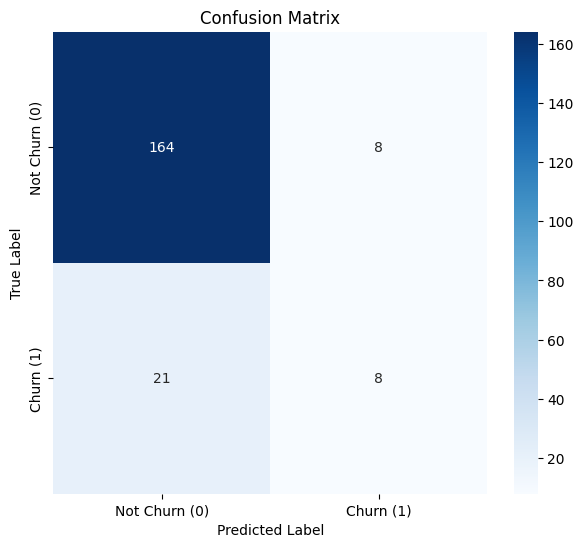

In [35]:
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn (0)', 'Churn (1)'],
            yticklabels=['Not Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
class_report = classification_report(y_test, y_pred, target_names=['Not Churn (0)', 'Churn (1)'])
print("\nClassification Report:")
print(class_report)


Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       0.89      0.95      0.92       172
    Churn (1)       0.50      0.28      0.36        29

     accuracy                           0.86       201
    macro avg       0.69      0.61      0.64       201
 weighted avg       0.83      0.86      0.84       201



In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [38]:
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.7430


<Figure size 800x700 with 0 Axes>

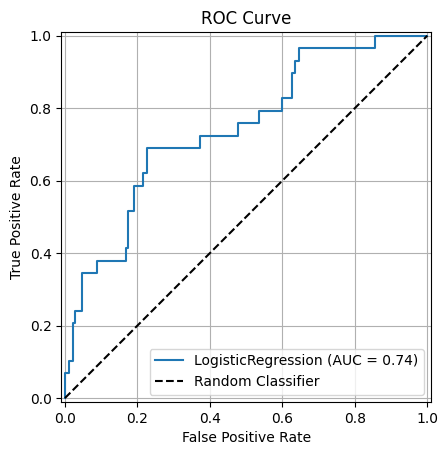

In [39]:
plt.figure(figsize=(8, 7))
RocCurveDisplay.from_estimator(log_reg_model, X_test_scaled_df, y_test)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
print("\n--- Conclusion ---")
print("The Logistic Regression model has been trained and evaluated.")
print("The interpretation of coefficients and odds ratios provides insights into feature importance.")
print("The evaluation metrics (accuracy, precision, recall, confusion matrix, and ROC-AUC) give a comprehensive understanding of the model's performance on unseen data.")
print("A higher ROC AUC score indicates better discrimination between the two classes.")


--- Conclusion ---
The Logistic Regression model has been trained and evaluated.
The interpretation of coefficients and odds ratios provides insights into feature importance.
The evaluation metrics (accuracy, precision, recall, confusion matrix, and ROC-AUC) give a comprehensive understanding of the model's performance on unseen data.
A higher ROC AUC score indicates better discrimination between the two classes.
